<a href="https://colab.research.google.com/github/Rodrigo-Lopes-de-Andrade/Artigos_e_Projetos/blob/main/Qualidade_do_vinho_tinto_EDA_classifica%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="center">
    <a href="https://medium.com/rodrigo-lopesandrade" alt="Contributors">
        <img src="https://img.shields.io/badge/Medium-RLA Data Science-magenta" />
    </a>
<a href="https://linkedin.com/in/rodrigo-lopes-de-andrade-51753246" alt="Contributors">
        <img src="https://img.shields.io/badge/Linkedin-Rodrigo Lopes de Andrade-cyan" />
    </a>
<a href="https://github.com/Rodrigo-Lopes-de-Andrade" alt="Contributors">
        <img src="https://img.shields.io/badge/GitHub-Rodrigo Lopes de Andrade-purple" />
    </a>
<p align="center">
  <img src="https://raw.githubusercontent.com/Rodrigo-Lopes-de-Andrade/Portifolio_Rodrigo_Andrade/main/LOGORLA.JPG" >
</p>

# Qualidade do vinho tinto EDA e classificação

![image.png](https://media.gazetadopovo.com.br/2021/05/18144256/shutterstock_1791971588-1-960x540.jpg)

1. [Bibliotecas e utilitários] (nº 1)
2. [Carregar e verificar os dados] (# 2)
3. [Estatísticas descritivas] (# 3)
4. [Valores ausentes] (# 4)
5. [Análise Exploratória de Dados] (# 5)
    * [Qualidade - Acidez Fixa - Densidade] (# 6)
    * [Qualidade] (# 7)
    * [Acidez fixa - Acidez volátil - Ácido cítrico - Açúcar residual] (# 8)
    * [Cloretos - Dióxido de Enxofre Livre - Dióxido de Enxofre Total - Densidade] (# 9)
    * [pH - Sulfatos - Álcool] (# 10)
    * [Relações entre pares] (# 11)
    * [Mapa de correlação] (# 12)
6. [Detecção de outlier] (# 13)
7. [Engenharia de recursos] (# 14) '
    * [Codificação do rótulo] (# 15)
8. [Pré-processamento] (# 16)
    * [Divisão de teste de trem] (# 17)
    * [Padronização] (# 18)
9. [Modelos] (# 19)
    * [Stochastic Gradient Descent] (# 20)
    * [Ajuste de hiperparâmetro - Pesquisa de grade - Validação cruzada] (# 22)
    * [Modelagem de conjunto] (# 23)

<a id = "1"></a>
# Biblitecas Necessárias

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

from collections import Counter

from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.model_selection import train_test_split 
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


import warnings
warnings.filterwarnings("ignore")

<a id = "2"> </a>
# Carregar e verificar os dados

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/Rodrigo-Lopes-de-Andrade/Datasets/main/winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.shape

(1599, 12)

<a id = "3"> </a>
# Estatísticas descritivas

In [5]:
describe = df.describe()
describe.T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


<a id = "4"></a>
# Missing Values

In [7]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<a id = "5"> </a>
# Análise exploratória de dados
<a id = "6"> </a>
## Qualidade - Acidez Fixa - Densidade

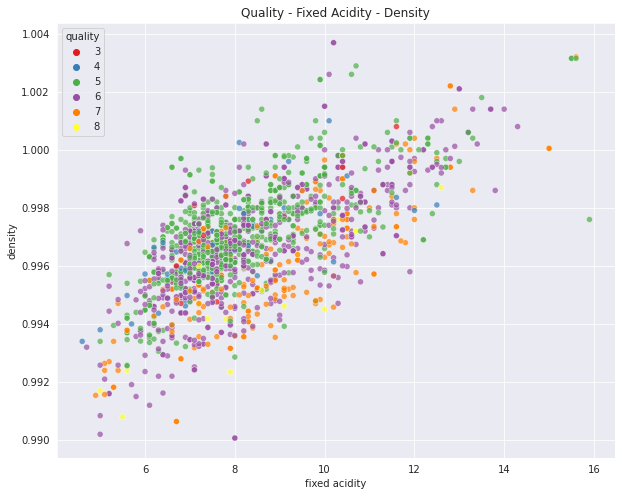

In [9]:
# Plotar: Qualidade - Acidez Fixa - Densidade
plt.figure(figsize = (10,8))
sns.scatterplot(x = "fixed acidity", y = "density", hue = "quality",data = df, alpha = 0.7, palette = "Set1")
plt.title("Quality - Fixed Acidity - Density", size = 12)
plt.show()

<a id = "7"></a>
## Analise da Qaulidade (Quality)

In [11]:
df["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

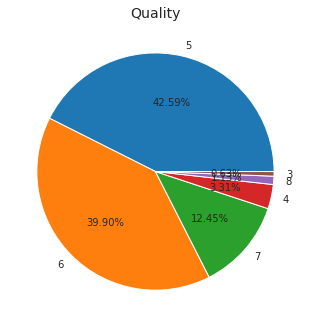

In [10]:
quality = df["quality"].value_counts()

fig = plt.figure(figsize=(12,12))

ax1 = plt.subplot2grid((2,2),(0,0))

plt.pie(x= quality, autopct="%.2f%%", labels=quality.keys(), pctdistance=0.6)
plt.title('Quality', size = 14)
plt.show()

<a id = "8"> </a>
## Analisando as varivaeis Acidez Fixa - Acidez Volátil - Ácido Cítrico - Açúcar Residual

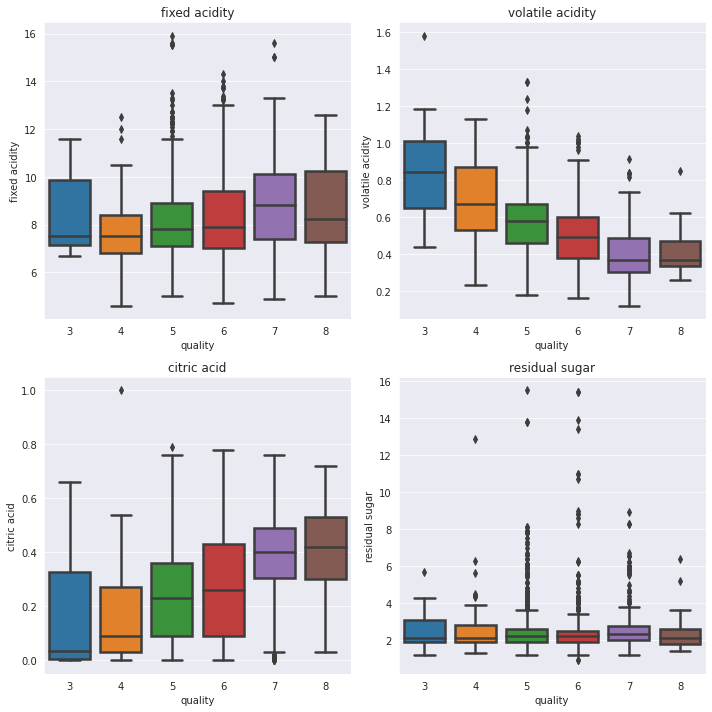

In [17]:
## Análisndo a Distribuição

fig = plt.figure(figsize=(10,10))
for index,column in enumerate(list(df.columns[0:4])):
    plt.subplot(2,2,index+1)
    sns.boxplot(y = df.loc[:, column], x = df["quality"], linewidth=2.5)
    plt.title(column, size = 12)
fig.tight_layout()

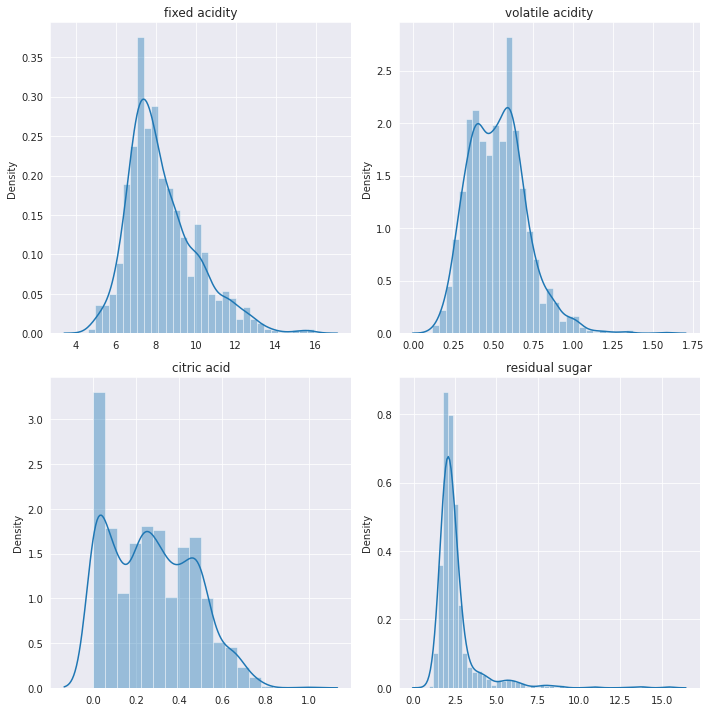

In [18]:
## Análisndo a Distribuição

fig = plt.figure(figsize=(10,10))
for index,column in enumerate(list(df.columns[0:4])):
    plt.subplot(2,2,index+1)
    sns.distplot(x = df.loc[:, column])
    plt.title(column, size = 12)
fig.tight_layout()

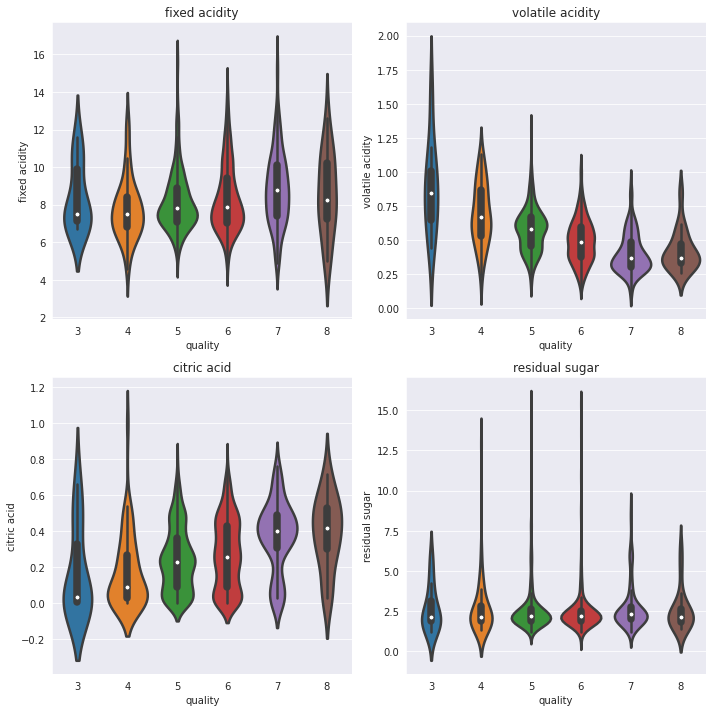

In [19]:
fig = plt.figure(figsize=(10,10))
for index,column in enumerate(list(df.columns[0:4])):
    plt.subplot(2,2,index+1)
    sns.violinplot(y = df.loc[:, column], x = df["quality"], linewidth=2.5)
    plt.title(column, size = 12)
fig.tight_layout()

<a id = "9"></a>
## Análisanso as variáveis Cloretos - Dióxido de Enxofre Livre - Dióxido de Enxofre Total - Densidade

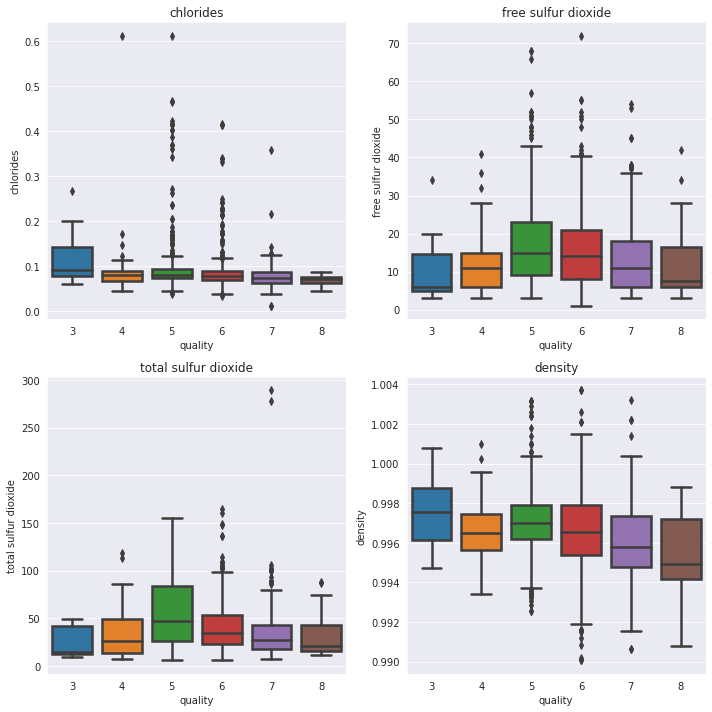

In [20]:
fig = plt.figure(figsize=(10,10))
for index,column in enumerate(list(df.columns[4:8])):
    plt.subplot(2,2,index+1)
    sns.boxplot(y = df.loc[:, column], x = df["quality"], linewidth=2.5)
    plt.title(column, size = 12)
fig.tight_layout()

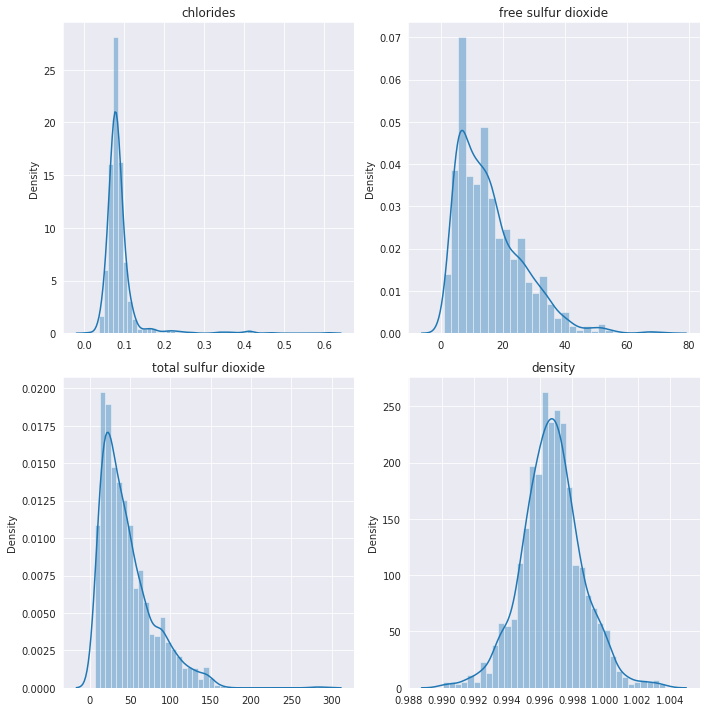

In [21]:
fig = plt.figure(figsize=(10,10))
for index,column in enumerate(list(df.columns[4:8])):
    plt.subplot(2,2,index+1)
    sns.distplot(x = df.loc[:, column])
    plt.title(column, size = 12)
fig.tight_layout()

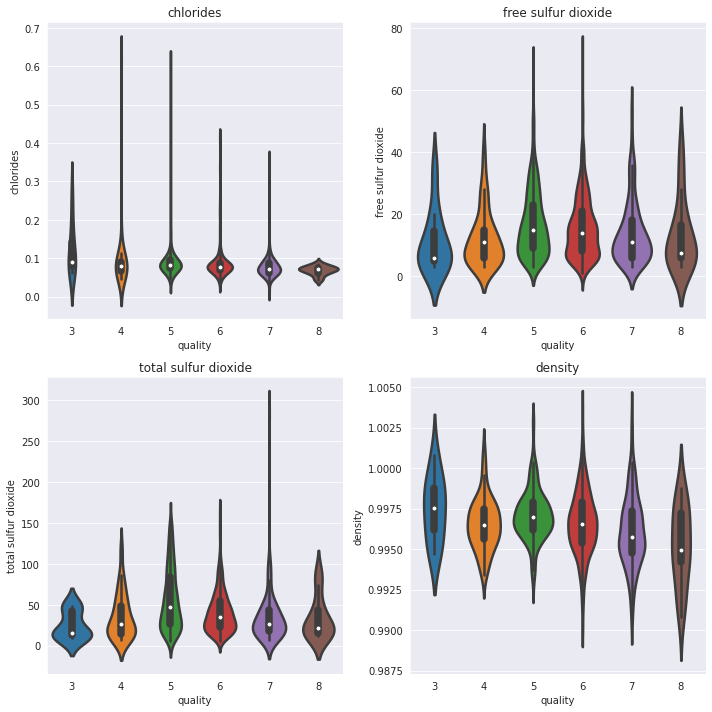

In [22]:
fig = plt.figure(figsize=(10,10))
for index,column in enumerate(list(df.columns[4:8])):
    plt.subplot(2,2,index+1)
    sns.violinplot(y = df.loc[:, column], x = df["quality"], linewidth=2.5)
    plt.title(column, size = 12)
fig.tight_layout()

<a id = "10"></a>
## Análisando as variáveis pH - Sulfatos - Álcool

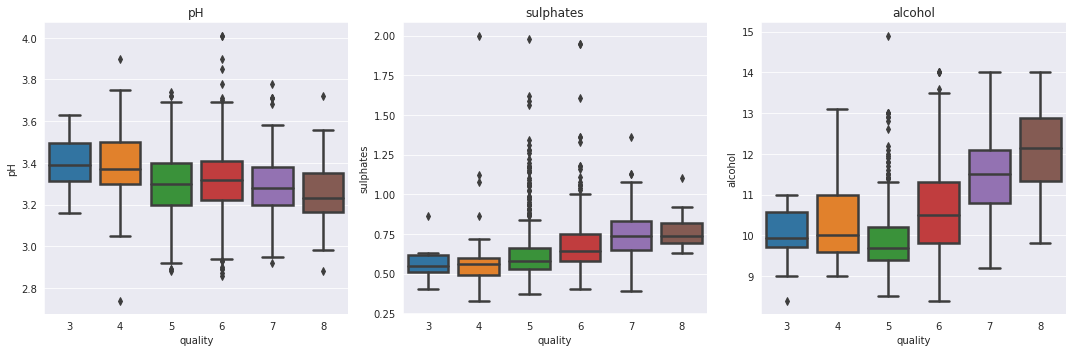

In [23]:
fig = plt.figure(figsize=(15,5))
for index,column in enumerate(list(df.columns[8:11])):
    plt.subplot(1,3,index+1)
    sns.boxplot(y = df.loc[:, column], x = df["quality"], linewidth=2.5)
    plt.title(column, size = 12)
fig.tight_layout()

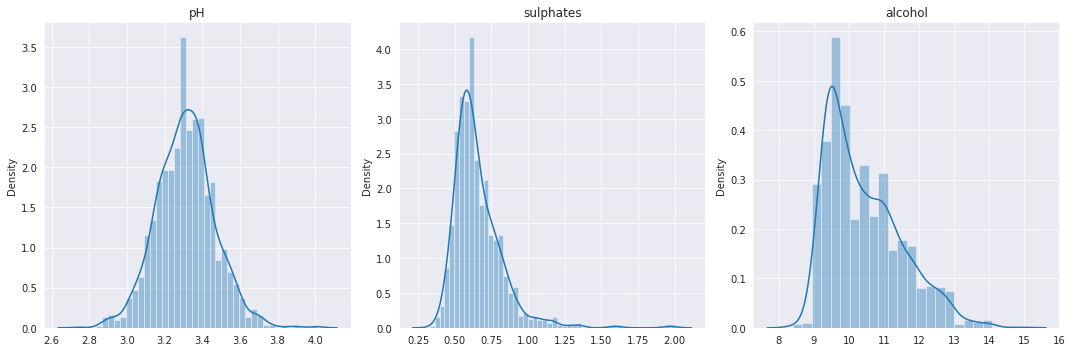

In [24]:
fig = plt.figure(figsize=(15,5))
for index,column in enumerate(list(df.columns[8:11])):
    plt.subplot(1,3,index+1)
    sns.distplot(x = df.loc[:, column])
    plt.title(column, size = 12)
fig.tight_layout()

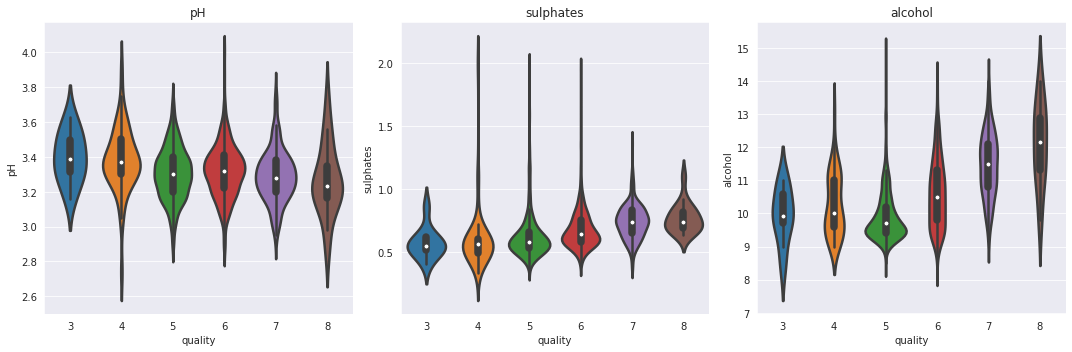

In [25]:
fig = plt.figure(figsize=(15,5))
for index,column in enumerate(list(df.columns[8:11])):
    plt.subplot(1,3,index+1)
    sns.violinplot(y = df.loc[:, column], x = df["quality"], linewidth=2.5)
    plt.title(column, size = 12)
fig.tight_layout()

<a id = "11"></a>
## Pairwise Relationships

<Figure size 432x288 with 0 Axes>

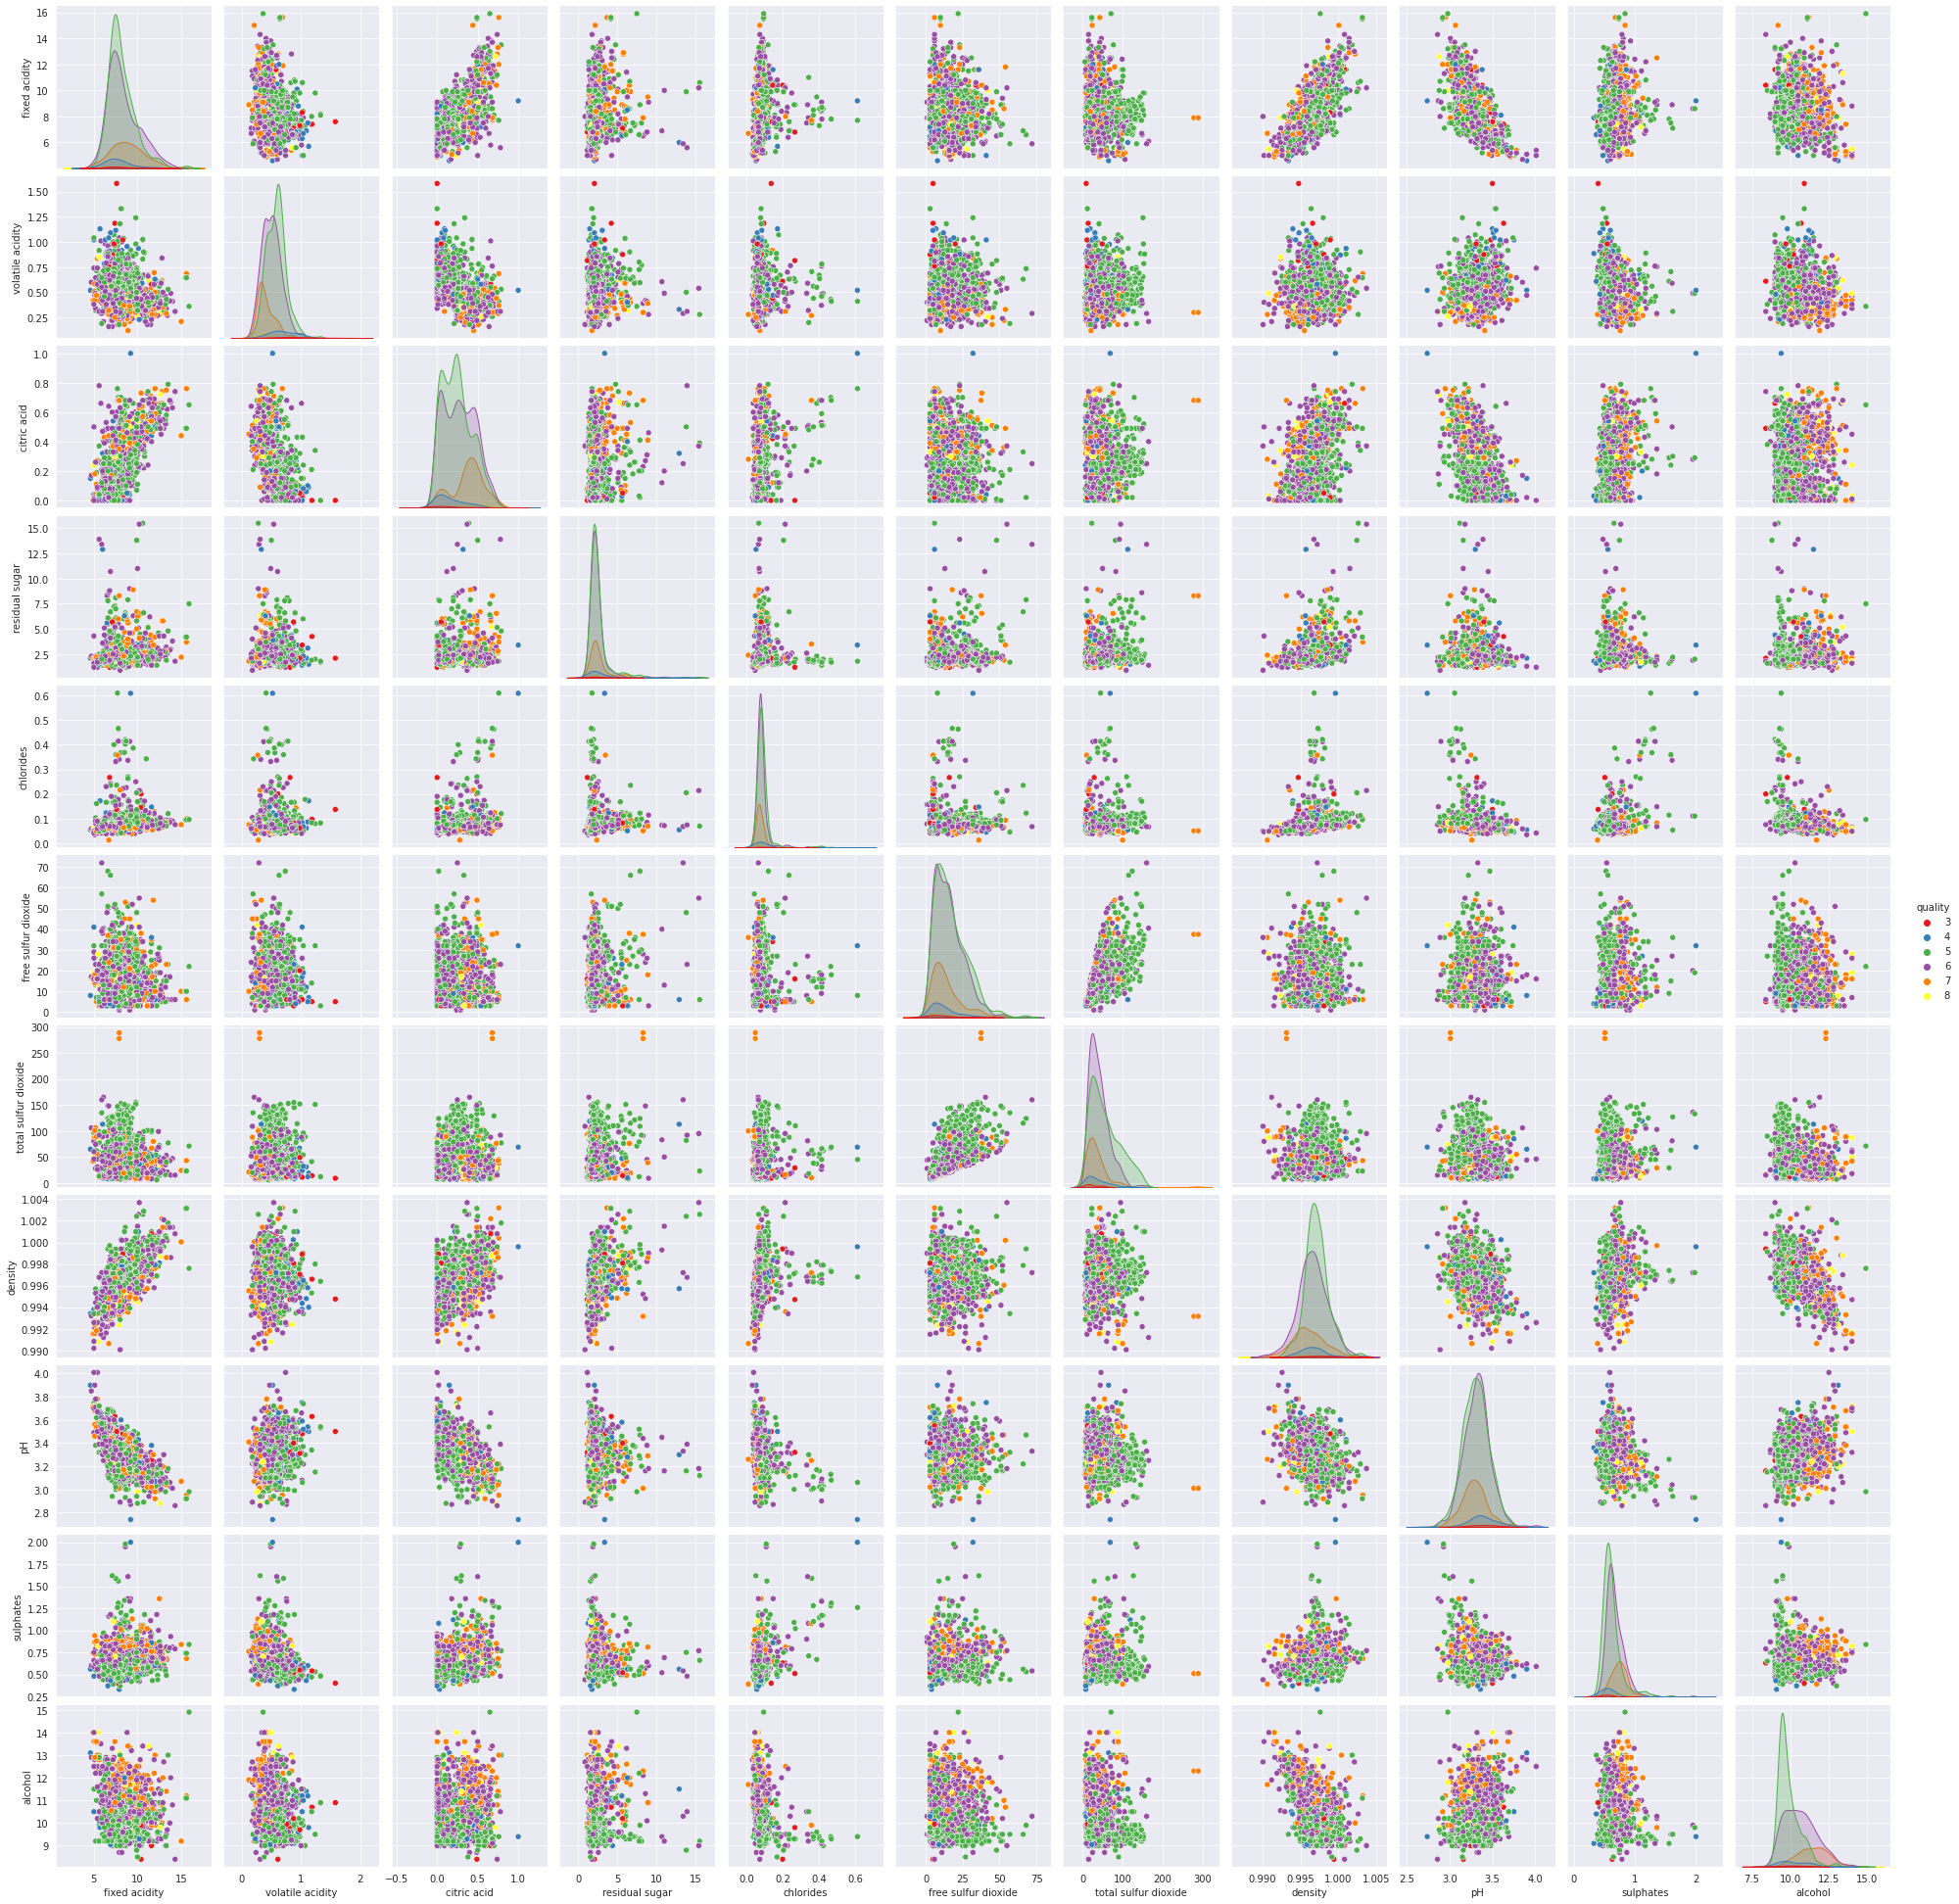

In [26]:
plt.figure()
sns.pairplot(df,hue = 'quality', palette = "Set1")
plt.show()

<a id = "12"> </a>
## Mapa de Correlação

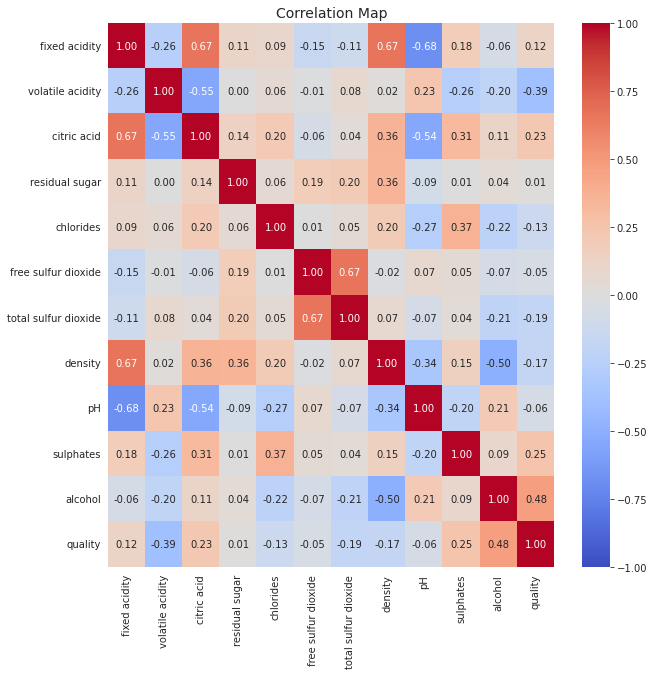

In [27]:
f,ax=plt.subplots(figsize = (10,10))
sns.heatmap(df.corr(),annot= True,fmt = ".2f",
            vmin = -1,
            vmax = 1,
            ax=ax,cmap = 'coolwarm')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map', size = 14)
plt.show()

<a id = "13"> </a>
# Detecção de outliers

In [33]:
# Detecta Outliers com base no Data Frame e Coluna
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1º quartil
        Q1 = np.percentile(df[c],25)
        # 3º quartil
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Limite de outlier IQR * 1.5
        outlier_step = IQR * 1.5
        # detecta valores discrepantes e seus índices
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # lisat os indeces
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

In [32]:
# Retorna o Indice de outliers
df.loc[detect_outliers(df,df.columns[:-1])]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
510,8.2,0.39,0.49,2.3,0.099,47.0,133.0,0.9979,3.38,0.99,9.8,5


In [30]:
# Deletar Outliers
df = df.drop(detect_outliers(df,df.columns[:-1]),axis = 0).reset_index(drop = True)
df.shape

(1566, 12)

<a id = "14"></a>
# Engenharia de Atributos - Feature Engineering

In [34]:
bins = (2, 6.5, 8)

group_names = ['bad', 'good']

df['quality'] = pd.cut(df['quality'], bins = bins, labels = group_names)

<a id = "15"></a>
## Label Encoding

In [40]:
label_quality = LabelEncoder()

df['quality'] = label_quality.fit_transform(df['quality'])

df['quality'].value_counts()

0    1355
1     211
Name: quality, dtype: int64

<a id = "16"></a>
# Preprocessing
<a id = "17"></a>
## Train Test Split

In [36]:
x = df.drop('quality', axis = 1)
y = df['quality']

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

<a id = "18"></a>
## Standardization

In [41]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

<a id = "19"></a>
# Modelos

- Stochastic Gradient Descent Classifier
- Decision Tree Classifier
- Support Vector Classifier
- Random Forest Classifier
- Logistic Regression Classifier
- K Neighbors Classifier

<a id = "20"></a>
## Stochastic Gradient Descent

In [42]:
sgd = SGDClassifier(penalty=None)

sgd.fit(X_train, Y_train)

pred_sgd = sgd.predict(X_test)

print(classification_report(Y_test, pred_sgd))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       397
           1       0.00      0.00      0.00        73

    accuracy                           0.84       470
   macro avg       0.42      0.50      0.46       470
weighted avg       0.71      0.84      0.77       470



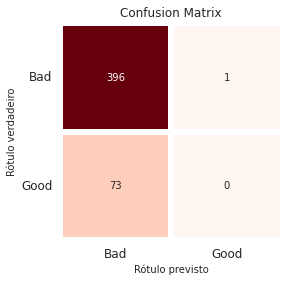

In [44]:
cm = confusion_matrix(Y_test, pred_sgd)

df1 = pd.DataFrame(columns=["Bad","Good"], index= ["Bad","Good"], data= cm )

f,ax = plt.subplots(figsize=(4,4))

sns.heatmap(df1, annot=True,cmap="Reds", fmt= '.0f',ax=ax,linewidths = 5, cbar = False)
plt.xlabel("Rótulo previsto")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("Rótulo verdadeiro")
plt.title("Confusion Matrix", size = 12)
plt.show()

<a id = "22"></a>
## Hyperparameter Tuning - Grid Search - Cross Validation

In [45]:
random_state = 42

classifier = [DecisionTreeClassifier(random_state = random_state),
             SVC(random_state = random_state),
             RandomForestClassifier(random_state = random_state),
             LogisticRegression(random_state = random_state),
             KNeighborsClassifier(),
             SGDClassifier()]

dt_param_grid = {"min_samples_split" : range(10,500,20),
                "max_depth": range(1,20,2)}

svc_param_grid = {"kernel" : ["rbf"],
                 "gamma": [0.001, 0.01, 0.1, 1],
                 "C": [1,10,50,100,200,300,1000]}

rf_param_grid = {"max_features": [1,3,10],
                "min_samples_split":[2,3,10],
                "min_samples_leaf":[1,3,10],
                "bootstrap":[False],
                "n_estimators":[100,300],
                "criterion":["gini"]}

logreg_param_grid = {"C":np.logspace(-3,3,7),
                    "penalty": ["l1","l2"]}

knn_param_grid = {"n_neighbors": np.linspace(1,19,10, dtype = int).tolist(),
                 "weights": ["uniform","distance"],
                 "metric":["euclidean","manhattan"]}
sgdc_param_grid = {
    "loss" : ["hinge", "log", "squared_hinge", "modified_huber"],
    "alpha" : [0.0001, 0.001, 0.01, 0.1],
    "penalty" : ["l2", "l1", "none"],
}

classifier_param = [dt_param_grid,
                   svc_param_grid,
                   rf_param_grid,
                   logreg_param_grid,
                   knn_param_grid,
                   sgdc_param_grid]

cv_result = []
best_estimators = []
for i in range(len(classifier)):
    clf = GridSearchCV(classifier[i],
                       param_grid=classifier_param[i],
                       cv = StratifiedKFold(n_splits = 10),
                       scoring = "accuracy",
                       n_jobs = -1,
                       verbose = 1)
    clf.fit(X_train,Y_train)
    cv_result.append(clf.best_score_)
    best_estimators.append(clf.best_estimator_)
    print(cv_result[i])

Fitting 10 folds for each of 250 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 778 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed:   10.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


0.874095079232694
Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 280 out of 280 | elapsed:    8.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


0.9096580483736447
Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   54.1s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  4.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


0.9133027522935778
Fitting 10 folds for each of 14 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


0.8868223519599667
Fitting 10 folds for each of 40 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Done 390 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    2.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


0.910533778148457
Fitting 10 folds for each of 48 candidates, totalling 480 fits
0.8859132610508758


[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:    5.3s finished


In [46]:
best_estimators

[DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=1, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=10,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=42, splitter='best'),
 SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
     probability=False, random_state=42, shrinking=True, tol=0.001,
     verbose=False),
 RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features=1,
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_

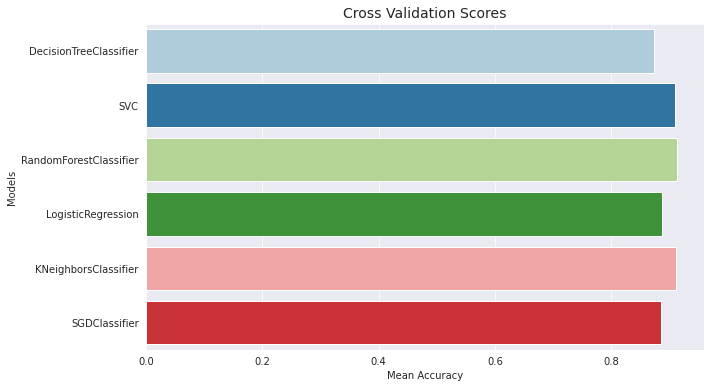

In [47]:
cv_results = pd.DataFrame({"Cross Validation Means":cv_result, "Models":["DecisionTreeClassifier", "SVC","RandomForestClassifier",
             "LogisticRegression",
             "KNeighborsClassifier",
             "SGDClassifier"]})
plt.figure(figsize = (10,6))
g = sns.barplot("Cross Validation Means", "Models", data = cv_results, palette = "Paired")
g.set_title("Cross Validation Scores", size = 14)
g.set_xlabel("Mean Accuracy")
plt.show()

<a id = "23"></a>
## Ensemble Modeling

In [48]:
votingC = VotingClassifier(estimators = [("svc",best_estimators[1]),
                                        ("rfc",best_estimators[2]),
                                        ("knn",best_estimators[4])])

votingC = votingC.fit(X_train, Y_train)

voting_pred = votingC.predict(X_test)

print(classification_report(Y_test, voting_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       397
           1       0.89      0.42      0.57        73

    accuracy                           0.90       470
   macro avg       0.89      0.71      0.76       470
weighted avg       0.90      0.90      0.89       470



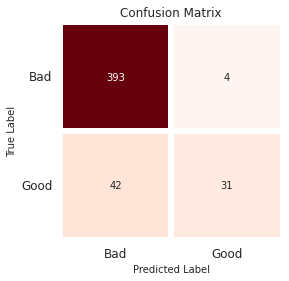

In [49]:
cm = confusion_matrix(Y_test, voting_pred)

df1 = pd.DataFrame(columns=["Bad","Good"], index= ["Bad","Good"], data= cm )

f,ax = plt.subplots(figsize=(4,4))

sns.heatmap(df1, annot=True,cmap="Reds", fmt= '.0f',ax=ax,linewidths = 5, cbar = False)
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 12)
plt.show()